## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
## importing libraries 

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "ticks")
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
## reading dataset

server_df = pd.read_csv('tips.csv')

## setting max columns to none
pd.set_option('display.max_columns', None)


server_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 1. Make a list of categorical and numerical columns in the data.

In [3]:
## getting all numerical columns

server_df.select_dtypes(['float64','int64']).columns

Index(['total_bill', 'tip', 'size'], dtype='object')

In [4]:
## getting all categorical columns

server_df.select_dtypes(['object']).columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

### 2. Compute the average bill amount for each day.

In [5]:
## getting mean of total_bill for each day

server_df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [6]:
## getting total value of tips provided by every gender

server_df.groupby('sex')['tip'].sum()

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

In [7]:
## showing the gender with highest value

server_df.groupby('sex')['tip'].sum().sort_values(ascending=False).head(1)

sex
Male    485.07
Name: tip, dtype: float64

### 4. According to the data, were there more customers for dinner or lunch?

In [8]:
## getting total number of customers during dinner/lunch

server_df.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

In [9]:
## fetching the time when customers were highest

server_df.groupby('time')['size'].sum().sort_values(ascending=False).head(1)

time
Dinner    463
Name: size, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [10]:
## getting the summary of the column 'tip'

server_df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### Comment:
- There are 244 float type entries for column 'tip' in the dataset
- The minimum tip amount is 0 and maximum tip amount is 10
- Average tip amount observed in the dataset is 2.99

### 6. Find the busiest day in terms of the orders?

In [11]:
## getting the total of size (people) for each day : orders per day

server_df.groupby('day')['size'].sum()

day
Fri      40
Sat     219
Sun     216
Thur    152
Name: size, dtype: int64

In [12]:
## fetching the day with highest of orders

server_df.groupby('day')['size'].sum().sort_values(ascending=False).head(1)

day
Sat    219
Name: size, dtype: int64

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [13]:
## getting skew value of the column 'total_bill'

server_df['total_bill'].skew()

1.1332130376158205

<AxesSubplot: xlabel='total_bill', ylabel='Density'>

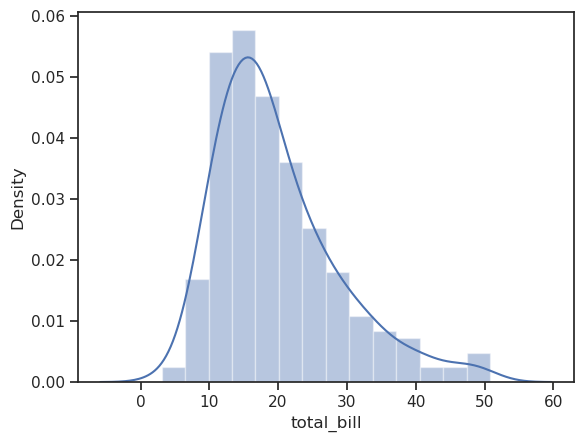

In [14]:
## plotting the skewness of the column 'total_bill'

sns.distplot(server_df['total_bill'])

### Comment:
- The skew value of column 'total_bill' is 1.133 (greater than 1). So it is positively skewed. 
- From the plot, it is clear that 'total_bill' is positively skewed due to the curve between 40 to 60.

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [15]:
## getting the correlation between 'tip' and 'total_bill'

server_df[['tip','total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


<AxesSubplot: xlabel='total_bill', ylabel='tip'>

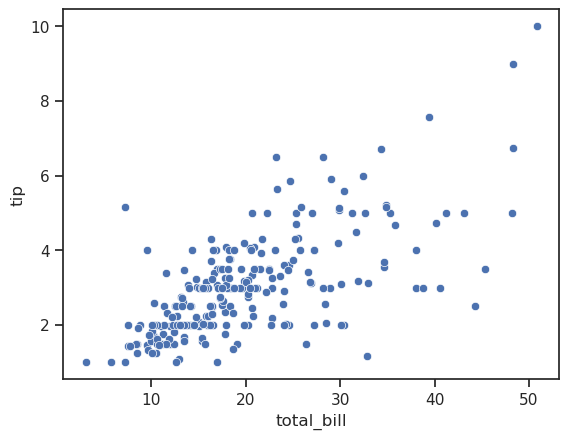

In [16]:
# plotting the distribution of tip and total_bill 

sns.scatterplot(x='total_bill', y='tip', data=server_df)

### Comment:
- From the plot, it is observed that as 'total_bill' increases 'tip' is also increasing. 
- 'tip' is directly proportional to 'total_bill' amount paid by the customer.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [17]:
## getting percentage of males and females in the dataset

server_df['sex'].value_counts(normalize=True)*100

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

<AxesSubplot: ylabel='sex'>

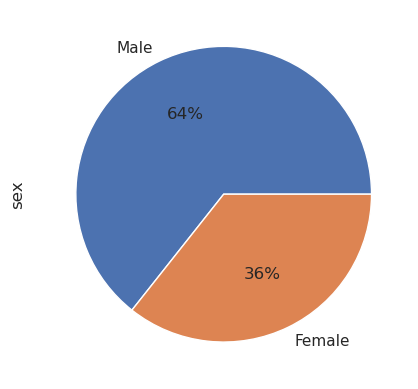

In [18]:
## plotting the percentage values in pie-chart

server_df['sex'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [19]:
## getting gender-wise count based on smoking habits

pd.crosstab(server_df['sex'], server_df['smoker'])

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


<AxesSubplot: xlabel='sex'>

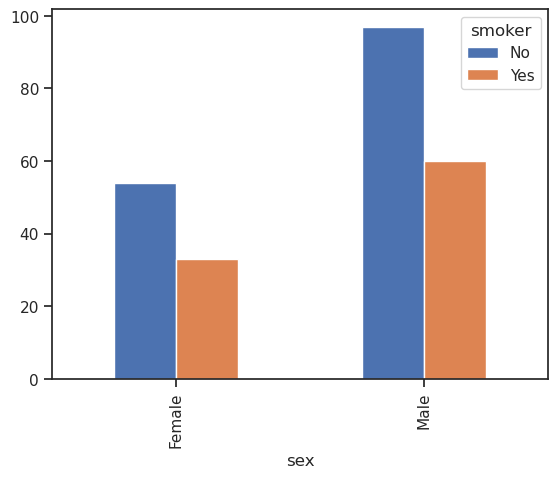

In [20]:
## plotting the gender-wise count based on smoking habits

pd.crosstab(server_df['sex'], server_df['smoker']).plot(kind='bar')

### 11. Compute the average tip amount given for different days and display it in the plot.

In [21]:
## getting average of tip amount for each day

server_df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

<AxesSubplot: xlabel='day', ylabel='tip'>

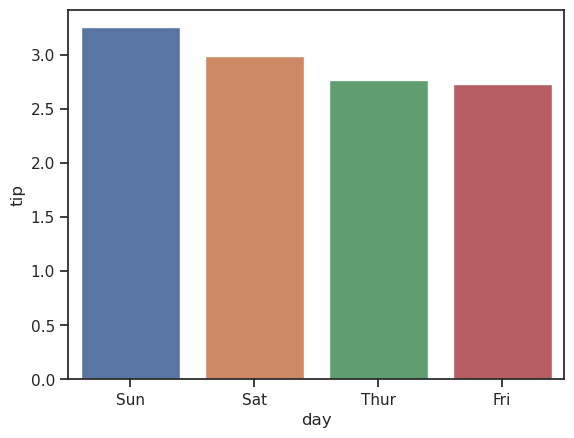

In [22]:
## plotting the average of tip amount for every day in bar-plot

sns.barplot(x='day', y='tip', data=server_df, estimator=np.mean, ci=False)

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

In [23]:
## getting avaerage bill amount as per the size of customer group

server_df.groupby('size')['total_bill'].mean()

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

<AxesSubplot: xlabel='size', ylabel='total_bill'>

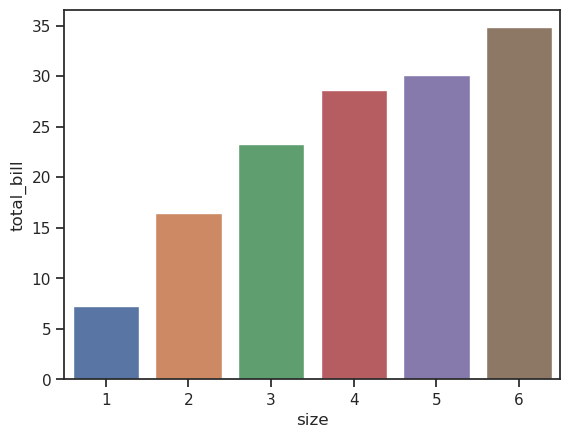

In [24]:
## plotting the relationship between total-bill amount and size

sns.barplot(x='size', y='total_bill', data=server_df, estimator=np.mean, ci=False)

### Comment:
- From the plot, it is observed that as 'total_bill' is dependant on the 'size' of the customer group.
- For the group with larger size, the bill amount is also large.
- So we can agree that there is a linear dependency between the group size and bill amount paid.

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<AxesSubplot: xlabel='total_bill', ylabel='sex'>

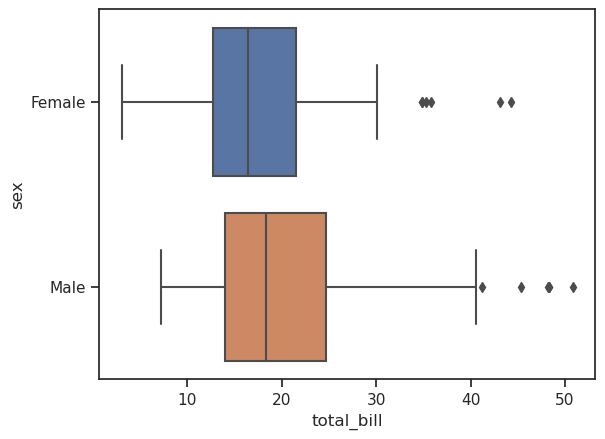

In [25]:
## plotting the horizontal box-plot for relation between bill and gender

sns.boxplot(x='total_bill', y='sex', data=server_df, orient='h')

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [26]:
## getting maximum bill amount for lunch and dinner on Saturday/Sunday


## filtering dataset for Saturday/Sunday only
array = ['Sat', 'Sun']
filter_df = server_df.loc[server_df['day'].isin(array)]

## fetching max of bill amount from filtered data
filter_df.groupby(['day','time'])['total_bill'].max() 

day  time  
Sat  Dinner    50.81
Sun  Dinner    48.17
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [27]:
## getting percentage of missing values

(server_df.isnull().sum()/len(server_df))*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [28]:
## getting duplicate records in the dataset

server_df[server_df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [29]:
## fetching entire dataset before dropping duplicates
server_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [31]:
## dropping duplicates
server_df1 = server_df.drop_duplicates()

In [32]:
## fetching entire dataset after dropping duplicates
server_df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Comment:
- Total Record: 244
- Duplicate Record: 1
- Total Records left after removing duplicate: 243

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

<AxesSubplot: >

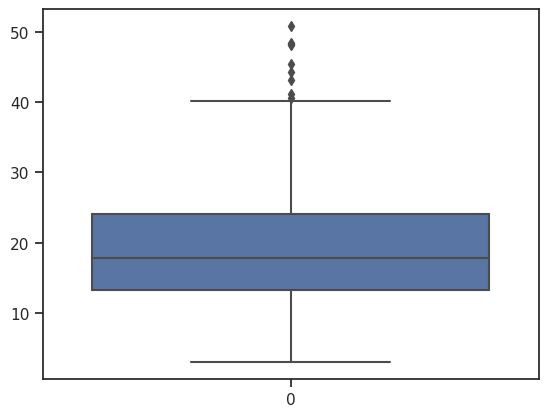

In [33]:
## plotting the box-plot of total-bill -- with outliers : before treatement

sns.boxplot(server_df['total_bill'])

<AxesSubplot: >

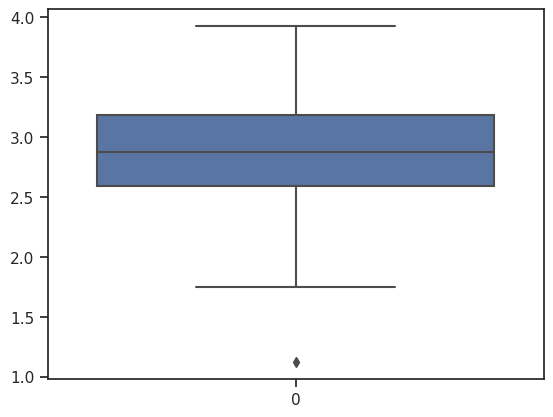

In [34]:
## plotting the box-plot of total-bill - after treating with transformation approach : after treatement

sns.boxplot(np.log(server_df['total_bill']))

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

<AxesSubplot: >

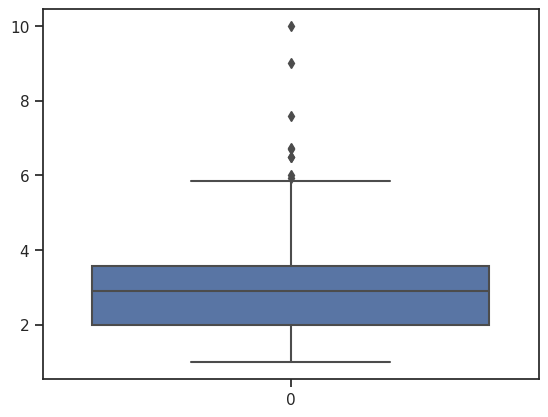

In [35]:
## plotting the box-plot for the column 'tip' : checking the outlier

sns.boxplot(server_df['tip'])

In [ ]:
## IQR treatment for outliers

Q1 = server_df['tip'].quantile(0.25)
Q2 = server_df['tip'].quantile(0.5)
Q3 = server_df['tip'].quantile(0.75)

IQR = Q3 - Q1

upper_range = Q3 + 1.5*IQR
lower_range = Q3 - 1.5*IQR

server_df_filter = server_df.loc[(server_df['tip'] > lower_range) & (server_df['tip'] < upper_range)]

In [ ]:
## plotting boxplot of IQR treated dataset

sns.boxplot(server_df_filter['tip'])

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [36]:
## fetching categorical data from the dataset

server_df_cat = server_df.select_dtypes('object')
server_df_cat

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [37]:
## encoding categorical columns in the dataset & printing 5 samples

pd.get_dummies(server_df_cat).head(5)

,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,1,0,1,0,0,0,1,0,1,0
1,0,1,1,0,0,0,1,0,1,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,1,0,0,0,1,0,1,0
4,1,0,1,0,0,0,1,0,1,0


In [38]:
## encoding categorical columns in the dataset (with first-column type removed) & printing 5 samples of simplified data

pd.get_dummies(server_df_cat, drop_first=True).head(5)

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,0,0,0,1,0,0
1,1,0,0,1,0,0
2,1,0,0,1,0,0
3,1,0,0,1,0,0
4,0,0,0,1,0,0


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [39]:
## importing library
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

In [40]:
## checking the min & max values of 'total_bill' column in current dataset

server_df['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [41]:
## transforming values of 'total_bill' in the range of 1

server_df['total_bill'] = minmax.fit_transform(server_df[['total_bill']])

In [42]:
## checking the min & max values of 'total_bill' column : after transformation

server_df['total_bill'].describe()

count    244.000000
mean       0.350145
std        0.186477
min        0.000000
25%        0.215281
50%        0.308442
75%        0.441087
max        1.000000
Name: total_bill, dtype: float64

### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [43]:
## loading dataset into tips_df

tips_df = pd.read_csv('tips.csv')

## setting max columns to none
pd.set_option('display.max_columns', None)


tips_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
## i) encoding categorical variables in the tips_df

tips_df = pd.get_dummies(tips_df, drop_first=True)

tips_df.head(5)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0


In [45]:
## ii) storing traget column 'tip' in variable Y and others in variable X

## storing traget column 'tip' in variable Y
Y = tips_df['tip']
Y.head(5)

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [46]:
## storing other columns in variable X
X = tips_df.drop('tip', axis=1)
X.head(5)

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,2,0,0,0,1,0,0
1,10.34,3,1,0,0,1,0,0
2,21.01,3,1,0,0,1,0,0
3,23.68,2,1,0,0,1,0,0
4,24.59,4,0,0,0,1,0,0


### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [47]:
## loading libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,StackingClassifier,GradientBoostingClassifier


## splitting the data

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(170, 8) (74, 8)
(170,) (74,)


In [48]:
## scaling the data using StandardScaler
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train.iloc[:,:])
X_test_sc = ss.fit_transform(X_test.iloc[:,:])

In [49]:
## scaling the data using MinMaxScaler

X_train_mm = minmax.fit_transform(X_train.iloc[:,:])
X_test_mm = minmax.fit_transform(X_test.iloc[:,:])

In [50]:
## standardizing columns 'total_bill' and 'size' using minmax approach

tips_df['total_bill'] = minmax.fit_transform(tips_df[['total_bill']])
tips_df['size'] = minmax.fit_transform(tips_df[['size']])

In [51]:
tips_df['total_bill'].describe

<bound method NDFrame.describe of 0      0.291579
1      0.152283
2      0.375786
3      0.431713
4      0.450775
         ...   
239    0.543779
240    0.505027
241    0.410557
242    0.308965
243    0.329074
Name: total_bill, Length: 244, dtype: float64>

In [52]:
tips_df['size'].describe

<bound method NDFrame.describe of 0      0.2
1      0.4
2      0.4
3      0.2
4      0.6
      ... 
239    0.4
240    0.2
241    0.2
242    0.2
243    0.2
Name: size, Length: 244, dtype: float64>

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


## training linear regression model with training data

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [54]:
## training linear regression model with scaled training data

model_sc = LinearRegression()
model_sc.fit(X_train_sc, Y_train)

LinearRegression()

In [55]:
## computing predictions on the test data

predictions = model.predict(X_test)
predictions_sc = model_sc.predict(X_test_sc)

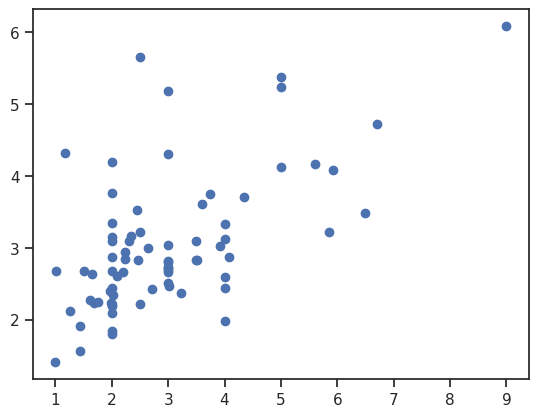

In [56]:
## plotting a graph to view the distribution between test-data and predictions

plt.scatter(Y_test, predictions)

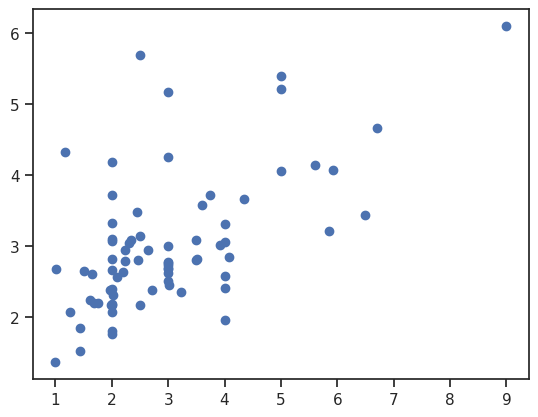

In [57]:
## plotting a graph to view the distribution between test-data and predictions of Standardized/Scaled test data

plt.scatter(Y_test, predictions_sc)

In [58]:
## computing r_squared value for scaled and unscaled test data


## r_squared value for unscaled test data
r2 = r2_score(Y_test, predictions)
print('The r_squared value on unscaled test-data is: ' + str(r2))
print()

## r_squared value for scaled test data
r2 = r2_score(Y_test, predictions_sc)
print('The r_squared value on scaled test-data is: ' + str(r2))
print()

The r_squared value on unscaled test-data is: 0.3489565406424622

The r_squared value on scaled test-data is: 0.35040192367997947



### Training a logistic regression model using the training data and printing the r_squared value of the prediction on the test data.

In [59]:
## splitting train and test data and scaling them using StandardScaler

X_train_log, X_test_log, Y_train_log, Y_test_log = train_test_split(X,Y,test_size=0.30)
print(X_train_log.shape, X_test_log.shape)
print(Y_train_log.shape, Y_test_log.shape)


ss = StandardScaler()

X_train_log_sc = ss.fit_transform(X_train_log.iloc[:,:])
X_test_log_sc = ss.fit_transform(X_test_log.iloc[:,:])

(170, 8) (74, 8)
(170,) (74,)


In [60]:
from sklearn import preprocessing
from sklearn.metrics import r2_score


# Label encoding
label_encoder = preprocessing.LabelEncoder()
Y_train1_log = label_encoder.fit_transform(Y_train_log)
Y_test1_log = label_encoder.fit_transform(Y_test_log)

## fit logistic regression model for the unscaled train dataset
log_reg = LogisticRegression()
log_reg.fit(X_train_log,Y_train1_log)

LogisticRegression()

In [61]:
## fit logistic regression model for the scaled train dataset
log_reg1 = LogisticRegression()
log_reg1.fit(X_train_log_sc,Y_train1_log)

LogisticRegression()

In [62]:
## compute y predicted labels for both scaled and unscaled data
y_pred_train_log = log_reg.predict(X_train_log)
y_pred_test_log = log_reg.predict(X_test_log)

y_pred_train_log_sc = log_reg1.predict(X_train_log_sc)
y_pred_test_log_sc = log_reg1.predict(X_test_log_sc)

In [63]:
## accuracy for unscaled data
print('accuracy train: ', accuracy_score(Y_train1_log,y_pred_train_log))
print('accuracy test: ', accuracy_score(Y_test1_log,y_pred_test_log))

accuracy train:  0.2411764705882353
accuracy test:  0.013513513513513514


In [64]:
## accuracy for scaled data
print('accuracy train: ', accuracy_score(Y_train1_log,y_pred_train_log_sc))
print('accuracy test: ', accuracy_score(Y_test1_log,y_pred_test_log_sc))

accuracy train:  0.28823529411764703
accuracy test:  0.013513513513513514


In [ ]:
## confusion matrix using test data
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log_reg,X_test_log,Y_test1_log)
#fig, ax = plt.subplots(figsize=(10, 10))
#plt.figure(figsize = (15, 6))
plt.show()

In [66]:
## computing r_squared value for scaled and unscaled data


## r_squared value for scaled data
r2_log = r2_score(Y_test1_log, y_pred_test_log_sc)
print('The r_squared value on scaled test-data is: ' + str(r2_log))
r2_log = r2_score(Y_train1_log, y_pred_train_log_sc)
print('The r_squared value on scaled train-data is: ' + str(r2_log))
print()


## r_squared value for unscaled data
r2_log = r2_score(Y_test1_log, y_pred_test_log)
print('The r_squared value on unscaled test-data is: ' + str(r2_log))
r2_log = r2_score(Y_train1_log, y_pred_train_log)
print('The r_squared value on unscaled train-data is: ' + str(r2_log))

The r_squared value on scaled test-data is: -0.6815526008274642
The r_squared value on scaled train-data is: 0.2506972835549852

The r_squared value on unscaled test-data is: -0.47991170907508596
The r_squared value on unscaled train-data is: 0.1683787601755914


### Computing r_squared value for 'tip' based on 'total_bill' value

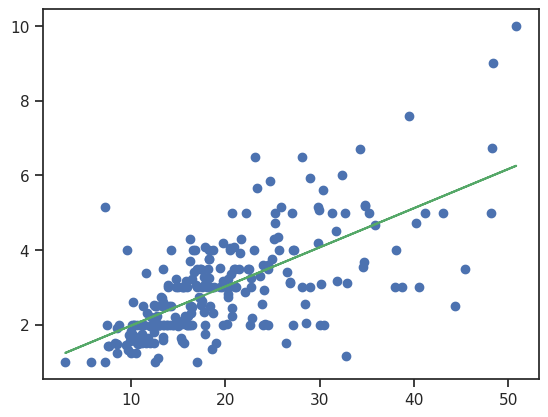

In [67]:
from scipy import stats
from sklearn.metrics import r2_score


#creating OLS regression
slope, intercept, r_value, p_value, std_err = stats.linregress(X['total_bill'],Y)
def linefitline(b):
    return intercept + slope * b
line1 = linefitline(X['total_bill'])

#plot line
plt.scatter(X['total_bill'],Y)
plt.plot(X['total_bill'],line1, c = 'g')
plt.show()

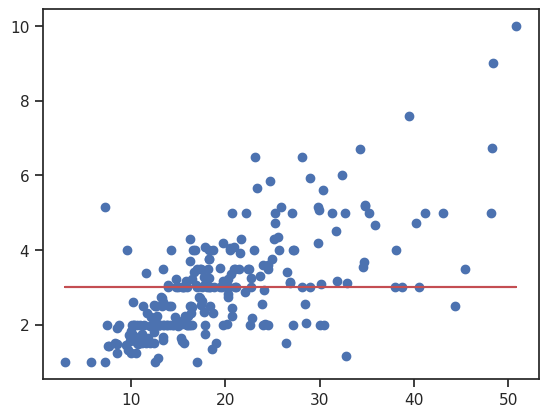

In [68]:
line2 = np.full(len(Y.axes[0]),[Y.mean()])
plt.scatter(X['total_bill'],Y)
plt.plot(X['total_bill'],line2, c = 'r')
plt.show()

In [69]:
differences_line1 = linefitline(X['total_bill'])-Y
line1sum = 0
for i in differences_line1:
    line1sum = line1sum + (i*i)
line1sum

252.78874385077597

In [70]:
differences_line2 = line2 - Y
line2sum = 0
for i in differences_line2:
    line2sum = line2sum + (i*i)
line2sum

465.21247704918073

In [71]:
r2 = r2_score(Y, linefitline(X['total_bill']))
print('The r_squared value is: ' + str(r2))

The r_squared value is: 0.45661658635167657


### Happy Learning:)